In [1]:
import numpy as np
print(np.__version__)

1.26.4


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score

In [10]:
#churn_df = pd.read_csv('telecom_churn_clean.csv')    Users/yourname/Documents/data.csv
churn_df = pd.read_csv('../Datasets/telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [5]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


### Accuracy for model prediction formula
correct predictions / total observations

### Train/test split + computing accuracy

We commonly use 20-30% of our data as the test set. By setting the test_size argument to 0.2 we use 20% here.

axis=0 means drop row and axis=1 means drop column

In [6]:
# Import the module
from sklearn.model_selection import train_test_split

#Remove the churn column from the DataFrame (because it's the label we want to predict).
#.values means convert the remaining data (features) into a NumPy array.
X = churn_df.drop("churn", axis=1).values
#print(X)
y = churn_df["churn"].values
#print(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))    #The model predicted correctly 85% of the time on the test data.

0.8545727136431784


### Overfitting and underfitting

In [7]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


### Visualizing model complexity

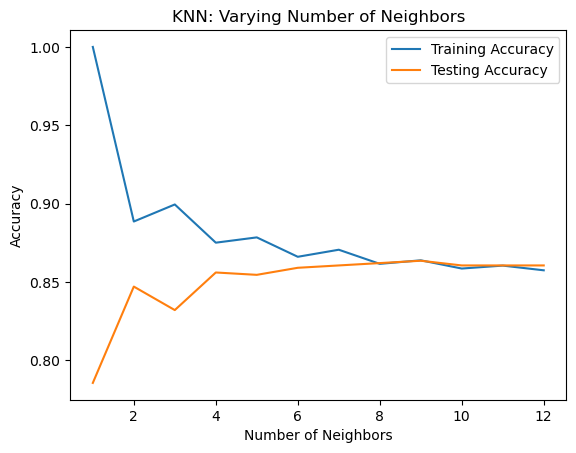

In [8]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Creating Features

In [9]:
sales_df = pd.read_csv('../Datasets/advertising_sales.csv')
print(sales_df.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


In [10]:
X = sales_df['radio']
print(X)
print(type(X))

0        6566.23
1        9237.76
2       15886.45
3       30020.03
4        8437.41
          ...   
4541     4472.36
4542    20610.69
4543    19800.07
4544    17534.64
4545    15966.69
Name: radio, Length: 4546, dtype: float64
<class 'pandas.core.series.Series'>


In [11]:
X = sales_df['radio'].values
print(X)
print(type(X))
print(X.shape)

[ 6566.23  9237.76 15886.45 ... 19800.07 17534.64 15966.69]
<class 'numpy.ndarray'>
(4546,)


In [12]:
y = sales_df['sales'].values
X = X.reshape(-1, 1)

print(X)
print('After reshaping:',X.shape)
print(X.shape, y.shape)

[[ 6566.23]
 [ 9237.76]
 [15886.45]
 ...
 [19800.07]
 [17534.64]
 [15966.69]]
After reshaping: (4546, 1)
(4546, 1) (4546,)


## Building a linear regression model

In [13]:
#from sklearn.linear_model import LinearRegression

#Create the model
reg = LinearRegression()

#Fit the model to the data
reg.fit(X, y)

#Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model

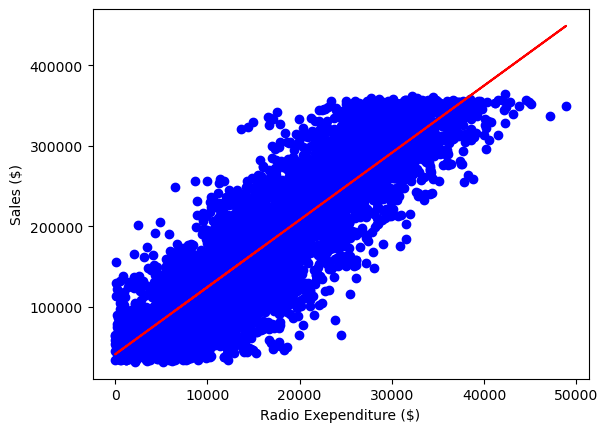

In [14]:
#Create scatter plot
plt.scatter(X, y, color='blue')

#Create line plot
plt.plot(X, predictions, color='red')

plt.xlabel('Radio Exependiture ($)')
plt.ylabel('Sales ($)')
plt.show()

## Fit and predict for regression

In [15]:
X = sales_df.drop(['sales', 'influencer'], axis=1).values
y = sales_df['sales'].values

X

array([[16000.  ,  6566.23,  2907.98],
       [13000.  ,  9237.76,  2409.57],
       [41000.  , 15886.45,  2913.41],
       ...,
       [44000.  , 19800.07,  5096.19],
       [71000.  , 17534.64,  1940.87],
       [42000.  , 15966.69,  5046.55]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Instantiate the model
reg = LinearRegression()

#Fit the model to the date
reg.fit(X_train, y_train)

#Make predictions
y_pred = reg.predict(X_test)

print('Predictions: {}, Actual Values: {}'.format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [17]:
print(sales_df.head())
print(sales_df.dtypes)

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18
tv              float64
radio           float64
social_media    float64
influencer       object
sales           float64
dtype: object


## Regression Performance

In [18]:
# Import mean_squared_error
#from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)   #root_mean_squared_error
#rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001238


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Cross-validation for R-squared

In [19]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


### Notice how R-squared for each fold ranged around 0.99? By using cross-validation, we can see how performance varies depending on how the data is split!

## Analyzing cross-validation metrics

In [20]:
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## Regularized regression: 
Regularization in regression, a technique used to avoid overfitting.
## Ridge Regression
With ridge, we use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha.

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In [21]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)

print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]


In [22]:
sales_columns = sales_df.drop(['sales', 'influencer'], axis=1).columns
print(sales_columns)

Index(['tv', 'radio', 'social_media'], dtype='object')


[ 3.56256962 -0.00397035  0.00496385]


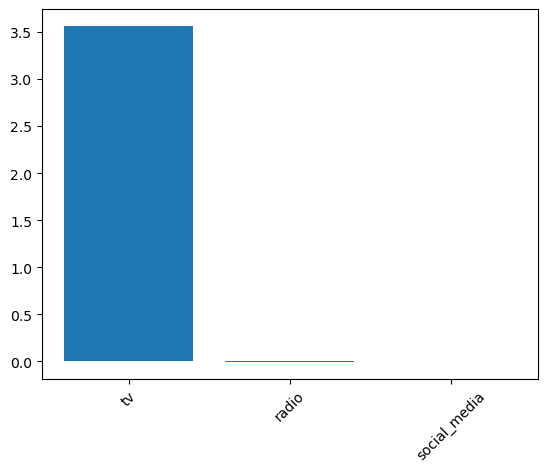

In [23]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_

print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

### Assessing a diabetes prediction classifier

In [5]:
diabetes_df = pd.read_csv('../Datasets/diabetes.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
X = diabetes_df[['bmi', 'age']].values
y = diabetes_df['diabetes'].values

#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[117  34]
 [ 47  33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.49      0.41      0.45        80

    accuracy                           0.65       231
   macro avg       0.60      0.59      0.60       231
weighted avg       0.64      0.65      0.64       231



## Logistic Regression
Logistic regression is used for classification. This model calculates the probability p, that an observation belongs to a binary class. Using our diabetes dataset as an example, if p is more than or equal to 0.5, we label the data as one, representing a prediction that an individual is more likely to have diabetes; if p is less than 0.5, we label it zero to represent that they are more likely to not have diabetes.
### Building a logistic regression model

##### Build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

In [27]:
features = diabetes_df.drop(['diabetes'], axis=1).values
target = diabetes_df['diabetes'].values

#print(features)
#print(target)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [28]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
#y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred_probs = logreg.predict_proba(X_test)
#print(y_pred_probs)
#print(y_pred_probs[:10])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Creating dummy variables

In [18]:
music_df = pd.read_csv("../Datasets/music.csv")
print(music_df.shape)
music_df.head()

(1000, 13)


,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


### drop_first=True Concept:

Without drop_first: you make 10 signboards, one for each room.
With drop_first=True: you make signboards for 9 rooms, and the missing room is treated as the default:
If none of the 9 signs match, then it must be the missing room.

If you keep all 10 dummy columns, each row always looks like: one column is 1 the other 9 columns are 0.

Example (song is Rock):

Alternative Anime Blues Classical Country Electronic HipHop Jazz Rap Rock
0 0 0 0 0 0 0 0 0 1

Now notice this:

If I already know the first 9 columns…

Alternative=0, Anime=0, ..., Rap=0

Then I can 100% guess the last one must be: Rock=1

So the “Rock” column is not new information. It is completely determined by the other columns. That’s what redundancy means: one column is predictable from the others, so it’s extra.

In [17]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

music_dummies.head()

Shape of music_dummies: (1000, 13)


,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


### Regression with categorical features

In [12]:
# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 10.008678539955676
Standard Deviation of the target array: 14.02156909907019


### Feature Value VS Coefficent

Feature value = the number in your dataset row (changes for every row) e.g., tv = 50, radio = 20, social = 10.

Coefficient = a fixed number the model learns (stays the same for all rows) it tells how strongly that feature affects the prediction.